# Libraries & Dataframe

In [ ]:
# Core Libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Modules
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, PrecisionRecallDisplay
)

In [ ]:
df = pd.read_csv('df.csv')
df.head(10)

,idstore,sku,brand,weight,oldpvp,newpvp,discount,margin,profit,payment_method,...,expiring_date,sell_date,shelf_life,time_to_sale,perc_expiring_sku,sold,type,selling_square_ft,district,labelling_day
0,Store 1,Product 1,Brand 1,260,4.22,2.11,0.5,0.16,0.3376,Card,...,2021-10-03,2021-10-02,2,1,0.010050,1,Large,4762,Évora,Friday
1,Store 1,Product 1,Brand 1,260,3.96,1.98,0.5,0.16,0.3168,NaN,...,2021-10-02,NaN,1,0,0.005025,0,Large,4762,Évora,Friday
2,Store 1,Product 1,Brand 1,260,4.74,2.37,0.5,0.16,0.3792,Cash,...,2021-10-03,2021-10-03,2,2,0.010050,1,Large,4762,Évora,Friday
3,Store 1,Product 1,Brand 1,260,4.20,2.10,0.5,0.16,0.3360,Card,...,2021-10-03,2021-10-02,2,1,0.010050,1,Large,4762,Évora,Friday
4,Store 1,Product 1,Brand 1,260,4.62,2.31,0.5,0.16,0.3696,Cash,...,2021-10-03,2021-10-03,2,2,0.010050,1,Large,4762,Évora,Friday
5,Store 1,Product 1,Brand 1,260,4.62,2.31,0.5,0.16,0.3696,Cash,...,2021-10-03,2021-10-03,2,2,0.010050,1,Large,4762,Évora,Friday
6,Store 1,Product 1,Brand 1,260,3.42,1.71,0.5,0.16,0.2736,Cash,...,2021-10-02,2021-10-02,1,1,0.005025,1,Large,4762,Évora,Friday
7,Store 1,Product 1,Brand 1,260,3.62,1.81,0.5,0.16,0.2896,Card,...,2021-10-02,2021-10-02,1,1,0.005025,1,Large,4762,Évora,Friday
8,Store 1,Product 1,Brand 1,260,4.62,2.31,0.5,0.16,0.3696,NaN,...,2021-10-02,NaN,1,0,0.005025,0,Large,4762,Évora,Friday
9,Store 1,Product 1,Brand 1,260,4.38,2.19,0.5,0.16,0.3504,Card,...,2021-10-03,2021-10-02,2,1,0.010050,1,Large,4762,Évora,Friday


# Data Pre-Processing

### Distribuição dos dados

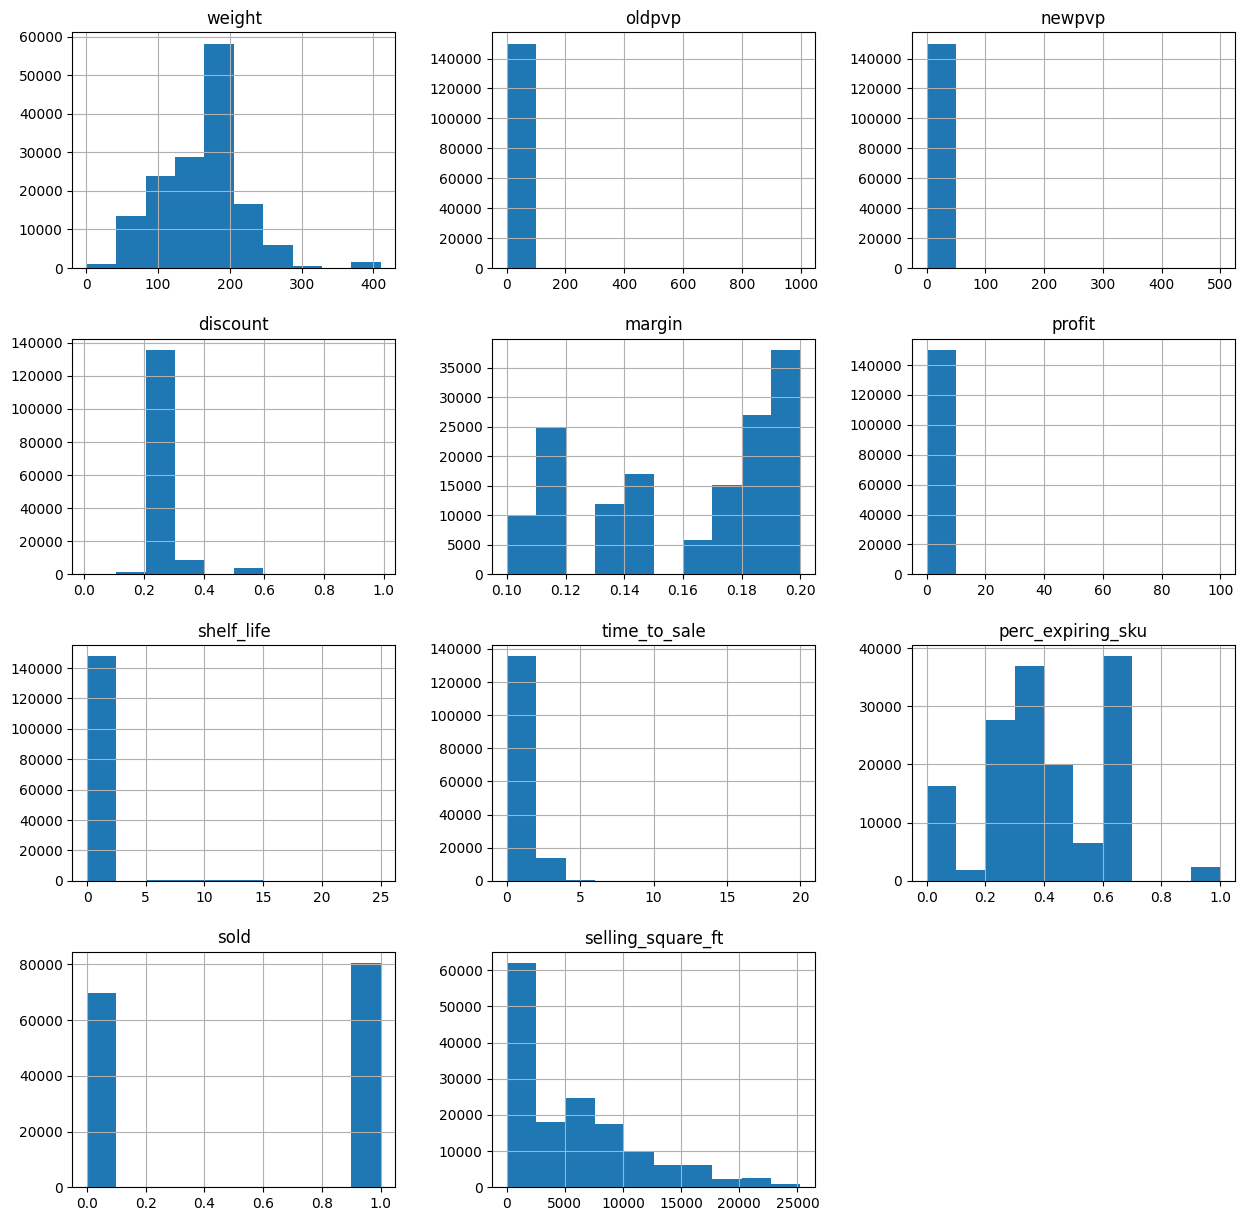

In [ ]:
#histogram all collumns
df.hist(figsize=(15,15))
plt.show()

### Box plots features com target

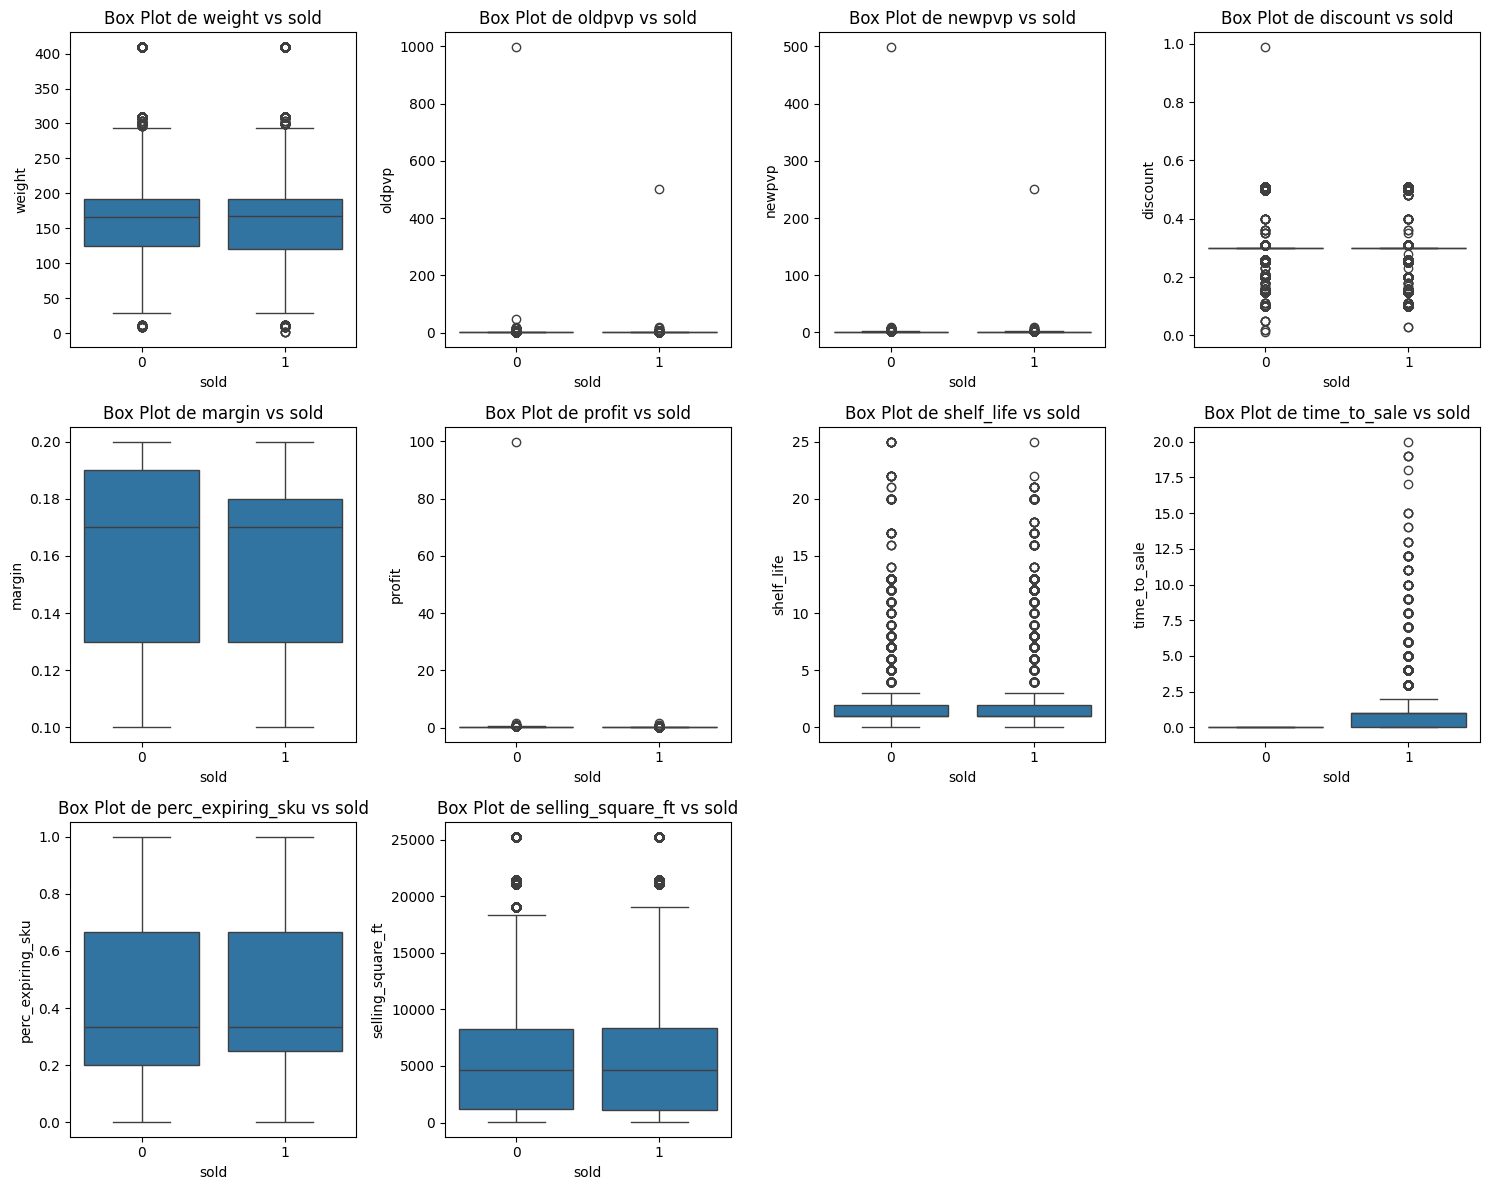

In [ ]:
# Identificar features numéricas e a variável target
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
target_variable = 'sold'  # Assumindo que a coluna alvo se chama 'sold'

# Remover a variável target, e idstore da lista de features numéricas
if target_variable  in numeric_features:
    numeric_features.remove(target_variable)


# Criar subplots para cada feature numérica
n_features = len(numeric_features)
n_cols = 4  # Número de colunas para os subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calcular o número de linhas necessário

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Aplanar o array de eixos para fácil iteração

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot de {feature} vs {target_variable}')
    axes[i].set_xlabel(target_variable)
    axes[i].set_ylabel(feature)

# Remover subplots vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Remover outliers

In [ ]:
# --- Função para winsorização (corte pelos percentis) ---
def winsorizar_serie(serie, inferior=0.01, superior=0.99):
    limite_inferior = serie.quantile(inferior)
    limite_superior = serie.quantile(superior)
    return serie.clip(lower=limite_inferior, upper=limite_superior)

# --- Transformações por variável ---

# 1. oldpvp: muito assimétrica à direita → aplicar logaritmo
df['oldpvp'] = np.log1p(df['oldpvp'])

# 2. newpvp: semelhante a oldpvp → aplicar logaritmo
df['newpvp'] = np.log1p(df['newpvp'])

# 3. profit: muitos valores próximos de 0, mas com outliers → winsorizar e depois aplicar log
df['profit'] = winsorizar_serie(df['profit'])
df['profit'] = np.log1p(df['profit'])

# 4. shelf_life: muitos valores baixos, alguns extremos → apenas winsorizar
df['shelf_life'] = winsorizar_serie(df['shelf_life'])

# 5. selling_square_ft: grande dispersão e cauda longa → aplicar logaritmo
df['selling_square_ft'] = np.log1p(df['selling_square_ft'])

### Distribuição (outliers tratados)

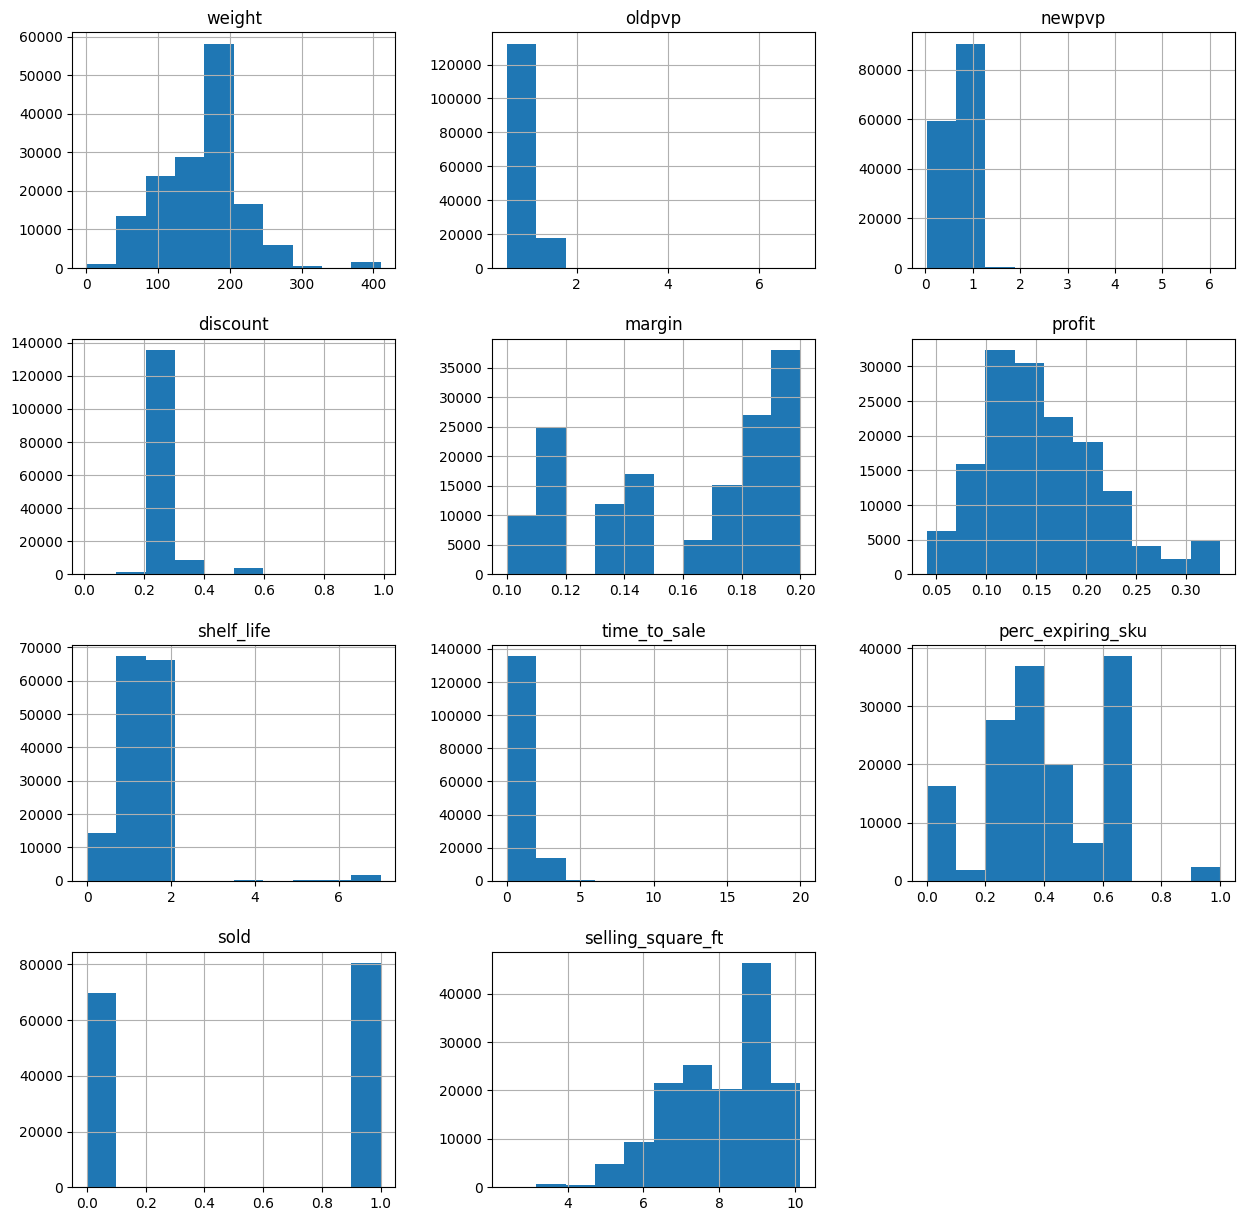

In [ ]:
#histogram all collumns
df.hist(figsize=(15,15))
plt.show()

### Box plots (outliers tratados)

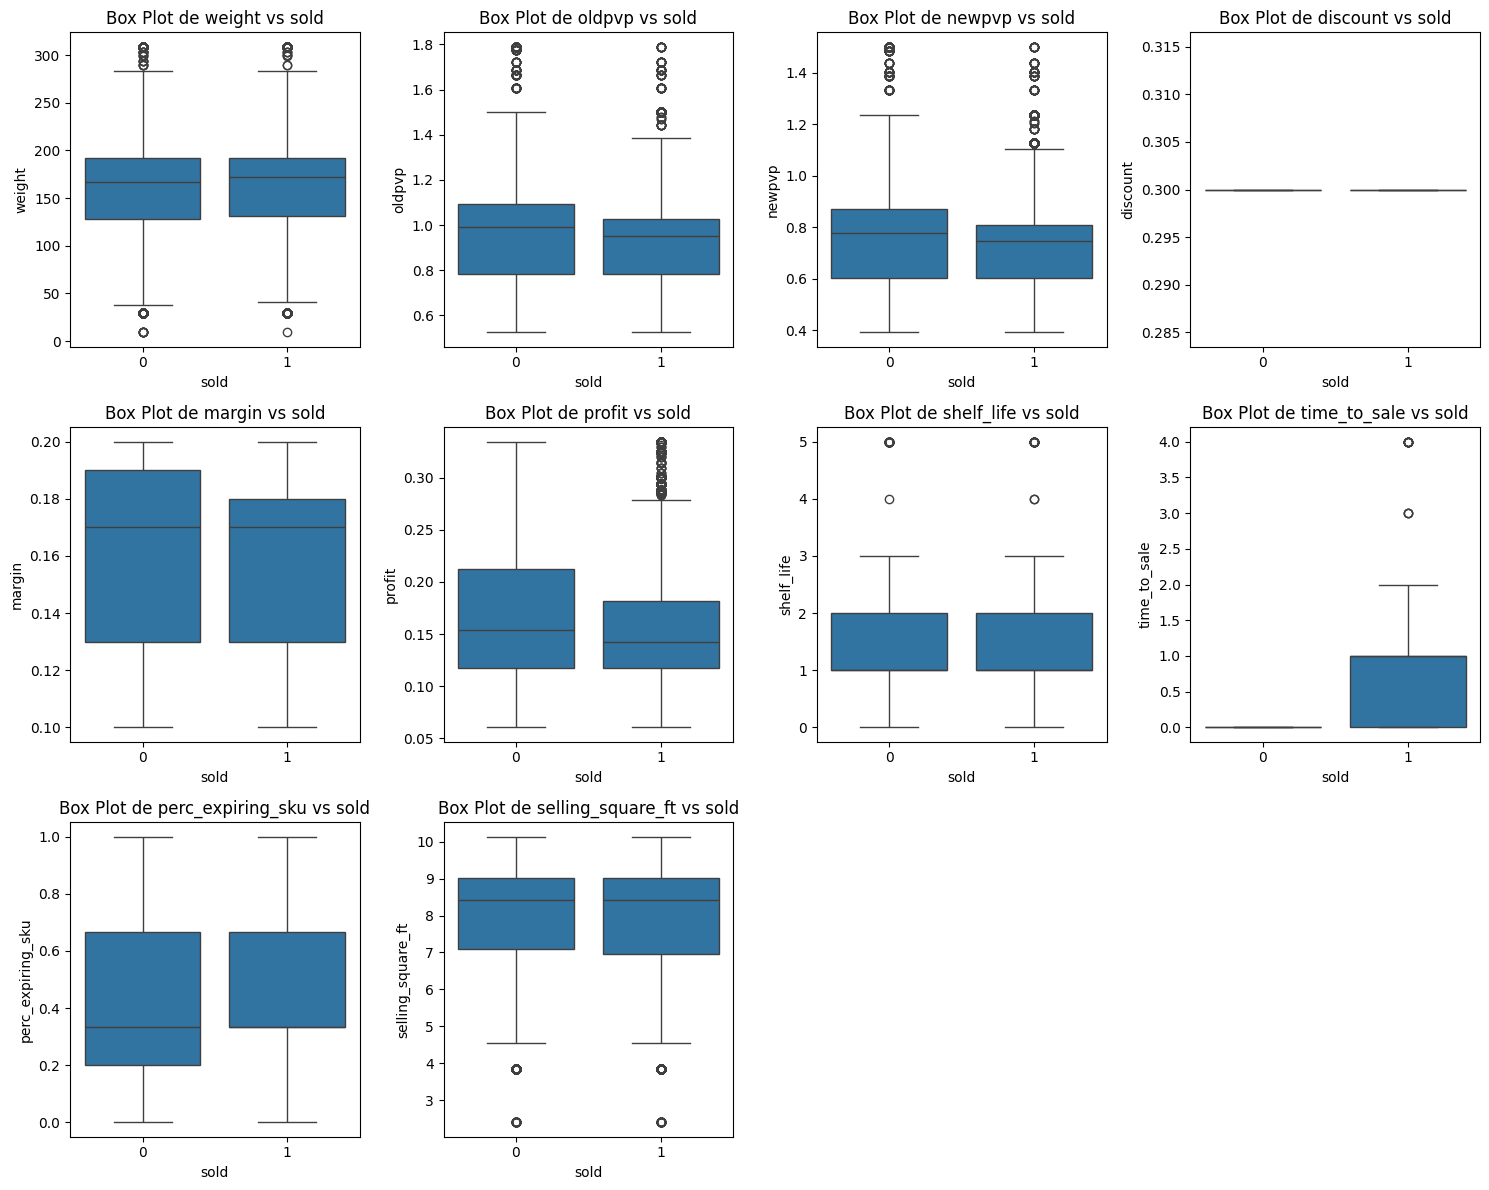

In [ ]:
# Identificar features numéricas e a variável target
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
target_variable = 'sold'  # Assumindo que a coluna alvo se chama 'sold'

# Remover a variável target, e idstore da lista de features numéricas
if target_variable  in numeric_features:
    numeric_features.remove(target_variable)

# Função para contar e remover outliers extremos (valores além de 3 * IQR)
def remove_extreme_outliers(df, features, multiplier=3):
    df_clean = df.copy()
    for col in features:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Aplicar a função para remover outliers extremos e sobrescrever df
df = remove_extreme_outliers(df, numeric_features)

# Criar subplots para cada feature numérica
n_features = len(numeric_features)
n_cols = 4  # Número de colunas para os subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calcular o número de linhas necessário

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Aplanar o array de eixos para fácil iteração

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot de {feature} vs {target_variable}')
    axes[i].set_xlabel(target_variable)
    axes[i].set_ylabel(feature)

# Remover subplots vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Remove columns payment_method, labelling_date, expiring_date, sell_date, time_to_sale
df = df.drop(['payment_method', 'labelling_date', 'expiring_date', 'sell_date', 'time_to_sale'], axis=1)

In [ ]:
# Drop sku column
df = df.drop(['sku'], axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Remove the target from numerical features if needed
target = 'sold'
if target in numerical_features:
    numerical_features.remove(target)

# Create ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Fit-transform the features
X_scaled = preprocessor.fit_transform(df.drop(columns=[target]))
df_target = df[target]

# Get feature names
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = num_feature_names + list(cat_feature_names)

# Create the final DataFrame
X_train_scaled = pd.DataFrame(X_scaled, columns=all_feature_names, index=df.index)

# Optional: check
display(X_train_scaled.head())


,weight,oldpvp,newpvp,discount,margin,profit,shelf_life,perc_expiring_sku,selling_square_ft,idstore_Store 1,...,district_Vila Real,district_Viseu,district_Évora,labelling_day_Friday,labelling_day_Monday,labelling_day_Saturday,labelling_day_Sunday,labelling_day_Thursday,labelling_day_Tuesday,labelling_day_Wednesday
121,-0.554943,2.048128,2.082365,1.110223e-16,0.324023,2.117364,-0.549306,-0.651821,1.048856,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122,-0.554943,2.048128,2.082365,1.110223e-16,0.324023,2.117364,-0.549306,-0.651821,1.048856,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
123,-0.554943,2.048128,2.082365,1.110223e-16,0.324023,2.117364,-0.549306,-0.651821,1.048856,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
124,-0.554943,2.048128,2.082365,1.110223e-16,0.324023,2.117364,-0.549306,-0.651821,1.048856,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,-0.554943,2.048128,2.082365,1.110223e-16,0.324023,2.117364,-0.549306,-0.651821,1.048856,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Train,test,split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_scaled is your feature matrix and y is the target
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, df_target, test_size=0.2, random_state=42)

# Models Baseline

## Regressão Logistica

### Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Train the model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_scaled, y_train)

# 2. Predict on test set
y_pred = model.predict(X_test_scaled)

# 3. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')


print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.655
Precision: 0.658
Recall:    0.765
F1 Score:  0.707


### Feature Importance

In [ ]:
import statsmodels.api as sm

# Add intercept to the feature matrix
X_train_scaled_sm = sm.add_constant(X_train_scaled)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_scaled_sm)
results = model_sm.fit()

# Print summary (includes p-values)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     41.05
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:26:43   Log-Likelihood:                -67734.
No. Observations:              103179   AIC:                         1.362e+05
Df Residuals:                  102826   BIC:                         1.395e+05
Df Model:                         352                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0094      0.002      5.743      0.0

Vamos correr random forest e xgboost para verificar a performance do dataset com as features todas.

## Random Forest

### Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 2. Predict on test set
y_pred = model.predict(X_test_scaled)

# 3. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change to 'binary' if binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.731
Precision: 0.755
Recall:    0.747
F1 Score:  0.751


### Feature Importance

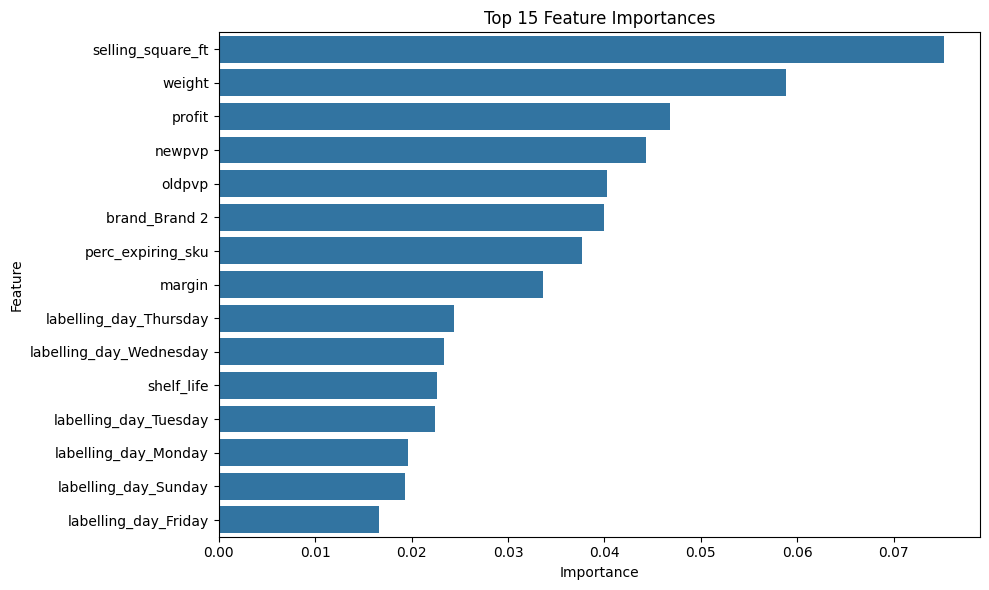

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
# Use the list of feature names created after preprocessing
features = all_feature_names

# Create DataFrame and sort
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

### Accuracy by Brand

In [ ]:
# Recreate brand_test using the index of y_test from the original dataframe
brand_test = df.loc[y_test.index, 'brand']

# Accuracy by brand
for brand in brand_test.unique():
    mask = brand_test == brand
    brand_acc = accuracy_score(y_test[mask], y_pred[mask])
    print(f"Accuracy for brand '{brand}': {brand_acc:.3f}")

Accuracy for brand 'Brand 5': 0.673
Accuracy for brand 'Brand 2': 0.734
Accuracy for brand 'Brand 7': 0.741
Accuracy for brand 'Brand 15': 0.710
Accuracy for brand 'Brand 3': 0.662
Accuracy for brand 'Brand 25': 0.765
Accuracy for brand 'Brand 28': 0.739
Accuracy for brand 'Brand 13': 0.833
Accuracy for brand 'Brand 8': 0.743
Accuracy for brand 'Brand 26': 0.752
Accuracy for brand 'Brand 9': 0.720
Accuracy for brand 'Brand 33': 0.780
Accuracy for brand 'Brand 6': 0.618
Accuracy for brand 'Brand 18': 0.737
Accuracy for brand 'Brand 4': 0.615
Accuracy for brand 'Brand 29': 0.727
Accuracy for brand 'Brand 10': 0.800
Accuracy for brand 'Brand 17': 0.827
Accuracy for brand 'Brand 21': 0.958
Accuracy for brand 'Brand 12': 0.867
Accuracy for brand 'Brand 16': 0.667
Accuracy for brand 'Brand 40': 0.417
Accuracy for brand 'Brand 23': 1.000
Accuracy for brand 'Brand 20': 0.333


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Recreate brand_test using the index of y_test from the original dataframe
brand_test = df.loc[y_test.index, 'brand']

# Create a list to store results
brand_metrics = []

# Total test samples
total_test = len(y_test)

# Loop over each brand
for brand in brand_test.unique():
    mask = brand_test == brand
    n_samples = mask.sum()
    acc = accuracy_score(y_test[mask], y_pred[mask])
    pct = n_samples / total_test

    brand_metrics.append({
        'Brand': brand,
        'Accuracy': round(acc, 3),
        'Samples': n_samples,
        'Test Share (%)': round(pct * 100, 2)
    })

# Convert to DataFrame and sort by Test Share
brand_results_df = pd.DataFrame(brand_metrics).sort_values(by='Test Share (%)', ascending=False)

# Display the result
print(brand_results_df.to_string(index=False))

   Brand  Accuracy  Samples  Test Share (%)
 Brand 2     0.734    18790           72.84
Brand 15     0.710     2306            8.94
 Brand 7     0.741     2287            8.87
 Brand 5     0.673     1009            3.91
Brand 25     0.765      260            1.01
 Brand 9     0.720      182            0.71
Brand 33     0.780      164            0.64
 Brand 3     0.662      145            0.56
Brand 28     0.739      134            0.52
Brand 26     0.752      121            0.47
 Brand 8     0.743      105            0.41
Brand 17     0.827       52            0.20
Brand 12     0.867       45            0.17
 Brand 6     0.618       34            0.13
Brand 29     0.727       33            0.13
Brand 13     0.833       30            0.12
 Brand 4     0.615       26            0.10
Brand 21     0.958       24            0.09
Brand 18     0.737       19            0.07
Brand 40     0.417       12            0.05
Brand 10     0.800       10            0.04
Brand 16     0.667        3     

### Confusion Matrix for Brand 2

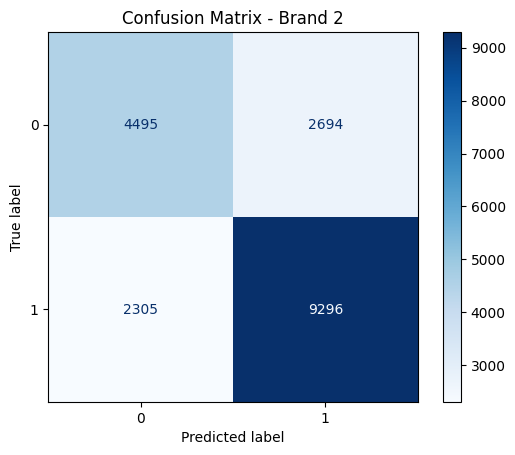

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Recreate brand_test using the index of y_test from the original dataframe
brand_test = df.loc[y_test.index, 'brand']

# 1. Filter test set for Brand 2
mask_brand2 = brand_test == 'Brand 2'
y_test_brand2 = y_test[mask_brand2]
y_pred_brand2 = y_pred[mask_brand2]

# 2. Compute confusion matrix
cm = confusion_matrix(y_test_brand2, y_pred_brand2)

# 3. Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Brand 2')
plt.show()

## XGBoost

### Accuracy

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# 2. Predict on test set
y_pred = model.predict(X_test_scaled)

# 3. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change to 'weighted' if multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:29:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.700
Precision: 0.712
Recall:    0.751
F1 Score:  0.731


### Feature Importance

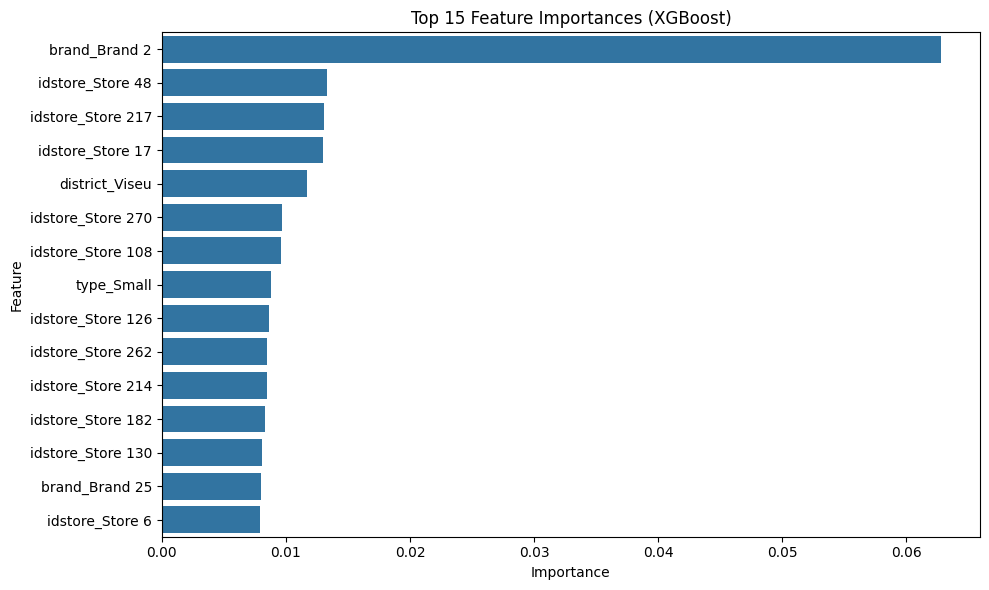

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
# Use the list of feature names created after preprocessing
features = all_feature_names

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

### Accuracy by Brand

In [ ]:
from sklearn.metrics import accuracy_score

# Loop over each unique brand and calculate accuracy
for brand in brand_test.unique():
    mask = brand_test == brand
    acc = accuracy_score(y_test[mask], y_pred[mask])
    print(f"Accuracy for brand '{brand}': {acc:.3f}")

Accuracy for brand 'Brand 5': 0.674
Accuracy for brand 'Brand 2': 0.699
Accuracy for brand 'Brand 7': 0.705
Accuracy for brand 'Brand 15': 0.703
Accuracy for brand 'Brand 3': 0.676
Accuracy for brand 'Brand 25': 0.704
Accuracy for brand 'Brand 28': 0.687
Accuracy for brand 'Brand 13': 0.800
Accuracy for brand 'Brand 8': 0.733
Accuracy for brand 'Brand 26': 0.727
Accuracy for brand 'Brand 9': 0.637
Accuracy for brand 'Brand 33': 0.793
Accuracy for brand 'Brand 6': 0.706
Accuracy for brand 'Brand 18': 0.737
Accuracy for brand 'Brand 4': 0.654
Accuracy for brand 'Brand 29': 0.636
Accuracy for brand 'Brand 10': 1.000
Accuracy for brand 'Brand 17': 0.731
Accuracy for brand 'Brand 21': 0.917
Accuracy for brand 'Brand 12': 0.844
Accuracy for brand 'Brand 16': 0.667
Accuracy for brand 'Brand 40': 0.583
Accuracy for brand 'Brand 23': 1.000
Accuracy for brand 'Brand 20': 0.333


## Dataset Brand Balance?

In [ ]:
# Overall brand distribution
print("Brand distribution (overall):")
print(df['brand'].value_counts(normalize=True).round(3))

Brand distribution (overall):
brand
Brand 2     0.728
Brand 15    0.091
Brand 7     0.087
Brand 5     0.040
Brand 25    0.010
Brand 9     0.007
Brand 3     0.006
Brand 33    0.006
Brand 28    0.005
Brand 8     0.004
Brand 26    0.004
Brand 17    0.002
Brand 12    0.002
Brand 6     0.001
Brand 29    0.001
Brand 21    0.001
Brand 4     0.001
Brand 13    0.001
Brand 18    0.001
Brand 40    0.001
Brand 10    0.000
Brand 16    0.000
Brand 20    0.000
Brand 23    0.000
Name: proportion, dtype: float64


In [ ]:
# Brand distribution in training set only
# Recreate brand_train using the index of y_train from the original dataframe
brand_train = df.loc[y_train.index, 'brand']

print("Brand distribution (training set):")
print(brand_train.value_counts(normalize=True).round(3))

Brand distribution (training set):
brand
Brand 2     0.728
Brand 15    0.091
Brand 7     0.087
Brand 5     0.040
Brand 25    0.010
Brand 9     0.008
Brand 3     0.007
Brand 33    0.006
Brand 28    0.005
Brand 8     0.004
Brand 26    0.003
Brand 17    0.002
Brand 12    0.002
Brand 6     0.001
Brand 21    0.001
Brand 29    0.001
Brand 4     0.001
Brand 13    0.001
Brand 18    0.001
Brand 40    0.001
Brand 10    0.000
Brand 16    0.000
Brand 20    0.000
Brand 23    0.000
Name: proportion, dtype: float64


# Models w/ Selected Features

### Define v1 Features

In [ ]:
top_f = ['selling_square_ft', 'weight', 'profit', 'newpvp', 'oldpvp', 'perc_expiring_sku', 'brand_Brand 2', 'margin', 'labelling_day_Thursday', 'labelling_day_Wednesday']

## Random Forest v1

### Accuracy

In [ ]:
# Convert X_train_scaled and X_test_scaled back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)


# 1. Subset feature matrices
X_train_top = X_train_scaled[top_f]
X_test_top = X_test_scaled[top_f]

# 2. Train the model
model_v1 = RandomForestClassifier(random_state=42)
model_v1.fit(X_train_top, y_train)

# 3. Predict on test set
y_pred = model_v1.predict(X_test_top)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.719
Precision: 0.741
Recall:    0.745
F1 Score:  0.743


### Feature Importance

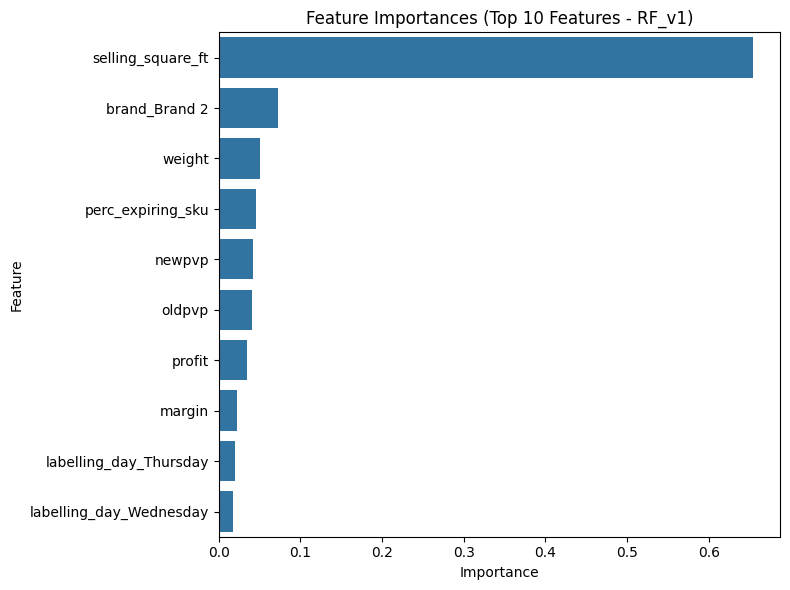

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get importances and corresponding feature names
importances = model_v1.feature_importances_
features = X_train_top.columns

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances (Top 10 Features - RF_v1)')
plt.tight_layout()
plt.show()

## XGBoost v1

### Accuracy

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)


# 1. Subset feature matrices
X_train_top = X_train_scaled[top_f]
X_test_top = X_test_scaled[top_f]

# 2. Train the model
xgb_model_v1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_v1.fit(X_train_top, y_train)

# 3. Predict on test set
y_pred_xgb = xgb_model_v1.predict(X_test_top)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='binary')  # Change to 'weighted' if multiclass
recall = recall_score(y_test, y_pred_xgb, average='binary')
f1 = f1_score(y_test, y_pred_xgb, average='binary')

print(f"[XGBoost Top Features] Accuracy:  {accuracy:.3f}")
print(f"[XGBoost Top Features] Precision: {precision:.3f}")
print(f"[XGBoost Top Features] Recall:    {recall:.3f}")
print(f"[XGBoost Top Features] F1 Score:  {f1:.3f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:29:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost Top Features] Accuracy:  0.698
[XGBoost Top Features] Precision: 0.710
[XGBoost Top Features] Recall:    0.753
[XGBoost Top Features] F1 Score:  0.731


### Feature Importance

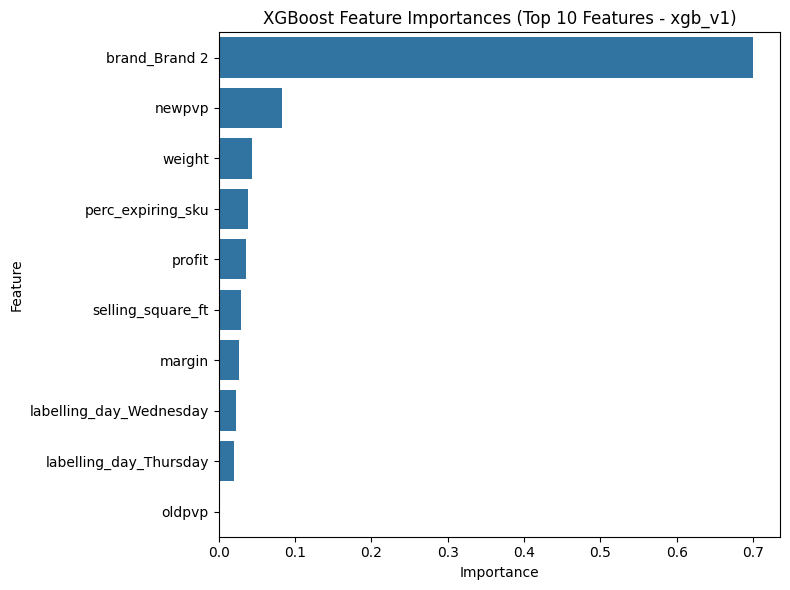

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importances and feature names
importances = xgb_model_v1.feature_importances_
features = X_train_top.columns

# 2. Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('XGBoost Feature Importances (Top 10 Features - xgb_v1)')
plt.tight_layout()
plt.show()

## Define v2 Features

In [ ]:
top_f2 = ['selling_square_ft', 'weight', 'newpvp', 'brand_Brand 2', 'profit', 'oldpvp', 'perc_expiring_sku', 'margin']

## Random Forest v2

### Accuracy

In [ ]:
# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)


# 1. Subset feature matrices
X_train_top2 = X_train_scaled[top_f2]
X_test_top2 = X_test_scaled[top_f2]

# 2. Train the model
model_v2 = RandomForestClassifier(random_state=42)
model_v2.fit(X_train_top2, y_train)

# 3. Predict on test set
y_pred = model_v2.predict(X_test_top2)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.708
Precision: 0.725
Recall:    0.745
F1 Score:  0.735


### Feature Importance

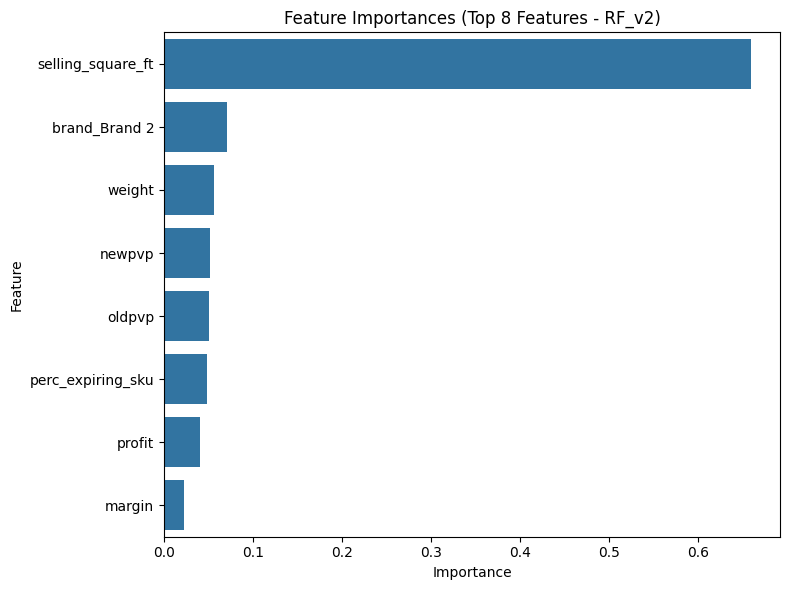

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get importances and corresponding feature names
importances = model_v2.feature_importances_
features = X_train_top2.columns

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances (Top 8 Features - RF_v2)')
plt.tight_layout()
plt.show()

## Xgboost v2

### Accuracy

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)


# 1. Subset feature matrices
X_train_top2 = X_train_scaled[top_f2]
X_test_top2 = X_test_scaled[top_f2]

# 2. Train the model
xgb_model_v2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_v2.fit(X_train_top2, y_train)

# 3. Predict on test set
y_pred_xgb = xgb_model_v2.predict(X_test_top2)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='binary')  # Change to 'weighted' if multiclass
recall = recall_score(y_test, y_pred_xgb, average='binary')
f1 = f1_score(y_test, y_pred_xgb, average='binary')

print(f"[XGBoost Top Features] Accuracy:  {accuracy:.3f}")
print(f"[XGBoost Top Features] Precision: {precision:.3f}")
print(f"[XGBoost Top Features] Recall:    {recall:.3f}")
print(f"[XGBoost Top Features] F1 Score:  {f1:.3f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:30:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost Top Features] Accuracy:  0.694
[XGBoost Top Features] Precision: 0.706
[XGBoost Top Features] Recall:    0.750
[XGBoost Top Features] F1 Score:  0.728


### Feature Importance

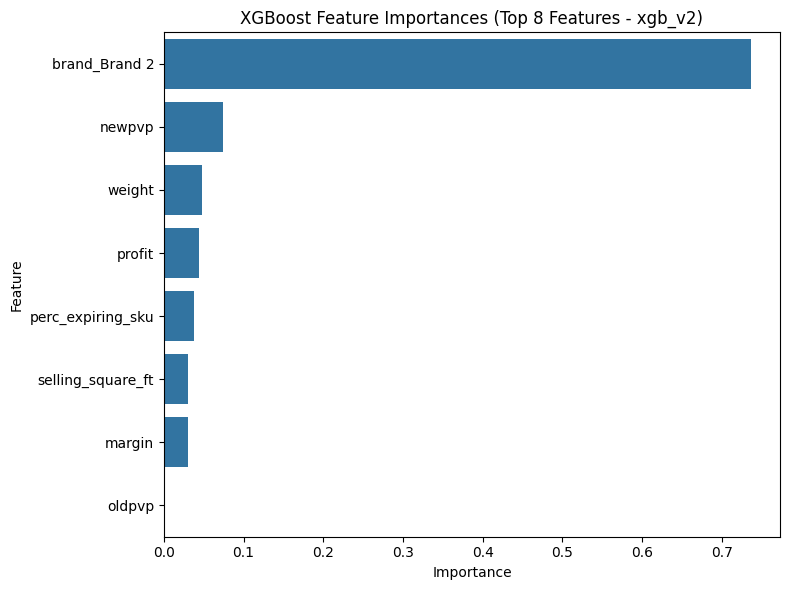

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importances and feature names
importances = xgb_model_v2.feature_importances_
features = X_train_top2.columns

# 2. Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('XGBoost Feature Importances (Top 8 Features - xgb_v2)')
plt.tight_layout()
plt.show()

## Define v3 Features

In [ ]:
top_f3 = ['selling_square_ft', 'weight', 'newpvp', 'brand_Brand 2', 'perc_expiring_sku']

## Random Forest v3

### Accuracy

In [ ]:
# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)


# 1. Subset feature matrices
X_train_top3 = X_train_scaled[top_f3]
X_test_top3 = X_test_scaled[top_f3]

# 2. Train the model
model_v3 = RandomForestClassifier(random_state=42)
model_v3.fit(X_train_top3, y_train)

# 3. Predict on test set
y_pred = model_v3.predict(X_test_top3)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.708
Precision: 0.725
Recall:    0.746
F1 Score:  0.735


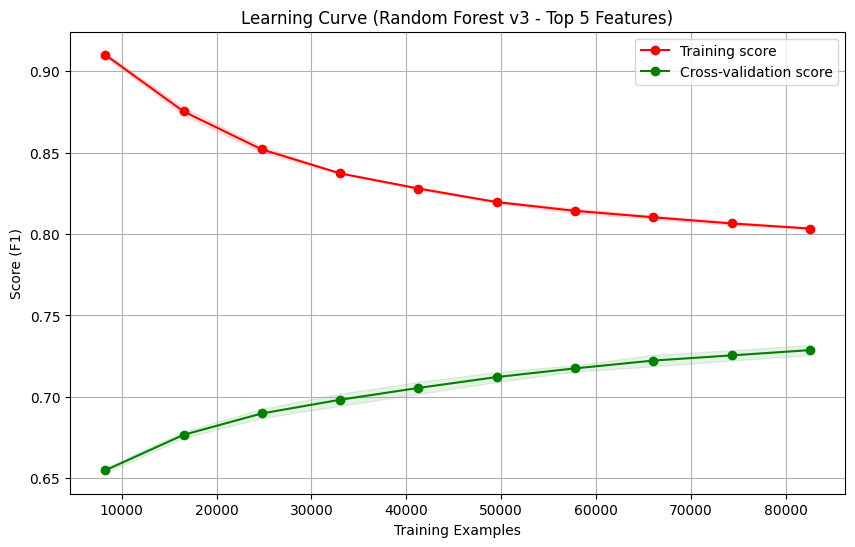

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Ensure X_train_top3 is a DataFrame with the correct columns
if not isinstance(X_train_top3, pd.DataFrame):
    # This conversion assumes X_train_top3 was created from a NumPy array.
    # A more robust approach would be to ensure X_train_top3 is always a DataFrame
    # after subsetting X_train_scaled (which is now converted to a DataFrame).
    # For now, we'll proceed assuming X_train_top3 is a DataFrame or will be made a DataFrame.
    pass # Assuming X_train_top3 is already a DataFrame or will be in future execution


# Calculate the learning curve for model_v3
train_sizes, train_scores, test_scores = learning_curve(
    model_v3,  # Use model_v3
    X_train_top3,  # Use the training data with top_f3 features
    y_train,
    cv=5,  # You can choose a suitable cross-validation strategy
    scoring='f1', # Use F1-score as the scoring metric
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Use 10 different sizes of the training set
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (Random Forest v3 - Top 5 Features)")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
plt.legend(loc="best")
plt.grid()
plt.show()

### Feature Importance

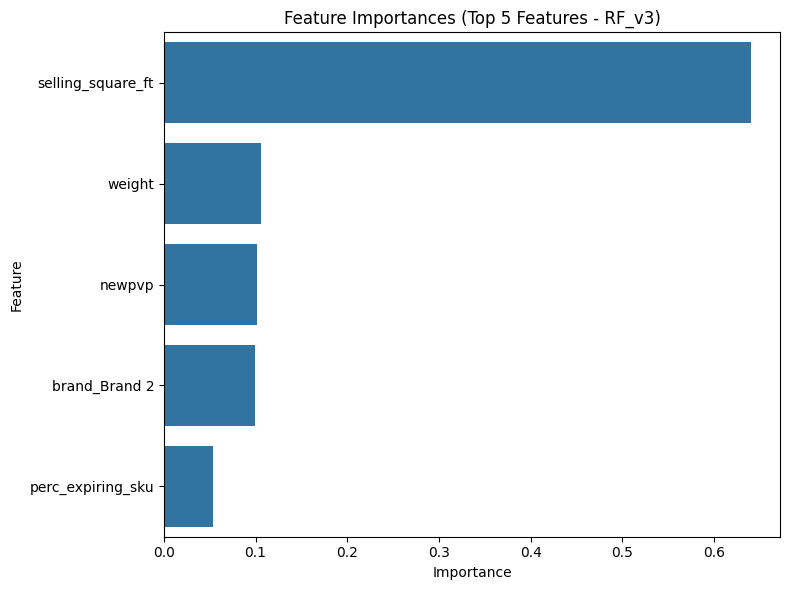

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get importances and corresponding feature names
importances = model_v3.feature_importances_
features = X_train_top3.columns

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances (Top 5 Features - RF_v3)')
plt.tight_layout()
plt.show()

## Define v4 Features

In [ ]:
top_f4 = ['selling_square_ft', 'weight', 'newpvp']

##Random Forest v4

###Accuracy

In [ ]:
# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)

# 1. Subset feature matrices
X_train_top4 = X_train_scaled[top_f4]
X_test_top4 = X_test_scaled[top_f4]

# 2. Train the model
model_v4 = RandomForestClassifier(random_state=42)
model_v4.fit(X_train_top4, y_train)

# 3. Predict on test set
y_pred = model_v4.predict(X_test_top4)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.696
Precision: 0.710
Recall:    0.746
F1 Score:  0.728


### Feature Importance

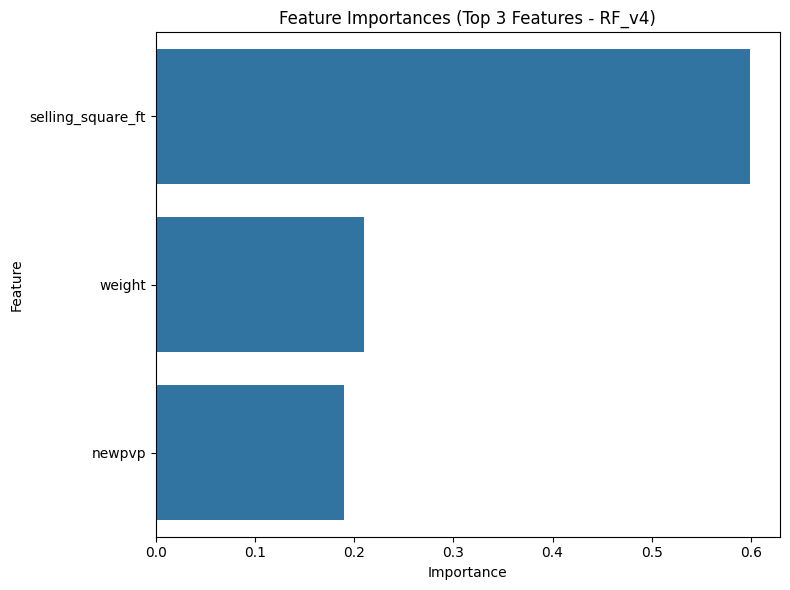

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get importances and corresponding feature names
importances = model_v4.feature_importances_
features = X_train_top4.columns

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances (Top 3 Features - RF_v4)')
plt.tight_layout()
plt.show()

##Define v5 Features

In [ ]:
top_f5 = ['selling_square_ft', 'weight']

## Random Forest v5

### Accuracy

In [ ]:
# Convert X_train_scaled and X_test_scaled back to DataFrames if they are not already
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=all_feature_names, index=y_train.index)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=all_feature_names, index=y_test.index)

# 1. Subset feature matrices
X_train_top5 = X_train_scaled[top_f5]
X_test_top5 = X_test_scaled[top_f5]

# 2. Train the model
model_v5 = RandomForestClassifier(random_state=42)
model_v5.fit(X_train_top5, y_train)

# 3. Predict on test set
y_pred = model_v5.predict(X_test_top5)

# 4. Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

Accuracy:  0.692
Precision: 0.706
Recall:    0.744
F1 Score:  0.725


###Feature Importance

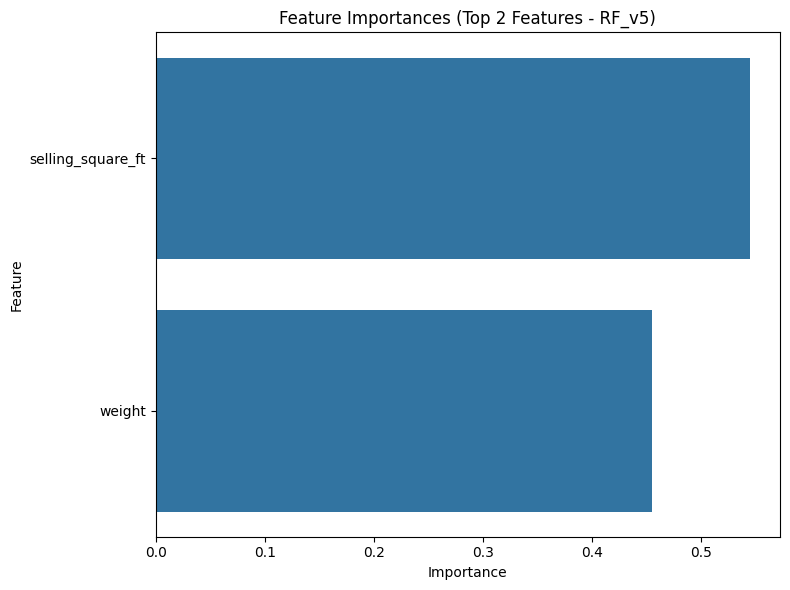

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get importances and corresponding feature names
importances = model_v5.feature_importances_
features = X_train_top5.columns

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances (Top 2 Features - RF_v5)')
plt.tight_layout()
plt.show()

In [ ]:
for brand in brand_test.unique():
    mask = brand_test == brand
    brand_acc = accuracy_score(y_test[mask], y_pred[mask])
    print(f"Accuracy for brand '{brand}': {brand_acc:.3f}")

Accuracy for brand 'Brand 5': 0.661
Accuracy for brand 'Brand 2': 0.695
Accuracy for brand 'Brand 7': 0.698
Accuracy for brand 'Brand 15': 0.672
Accuracy for brand 'Brand 3': 0.683
Accuracy for brand 'Brand 25': 0.700
Accuracy for brand 'Brand 28': 0.694
Accuracy for brand 'Brand 13': 0.767
Accuracy for brand 'Brand 8': 0.695
Accuracy for brand 'Brand 26': 0.694
Accuracy for brand 'Brand 9': 0.698
Accuracy for brand 'Brand 33': 0.738
Accuracy for brand 'Brand 6': 0.706
Accuracy for brand 'Brand 18': 0.789
Accuracy for brand 'Brand 4': 0.615
Accuracy for brand 'Brand 29': 0.545
Accuracy for brand 'Brand 10': 1.000
Accuracy for brand 'Brand 17': 0.731
Accuracy for brand 'Brand 21': 1.000
Accuracy for brand 'Brand 12': 0.756
Accuracy for brand 'Brand 16': 0.667
Accuracy for brand 'Brand 40': 0.417
Accuracy for brand 'Brand 23': 1.000
Accuracy for brand 'Brand 20': 0.667


<Figure size 800x600 with 0 Axes>

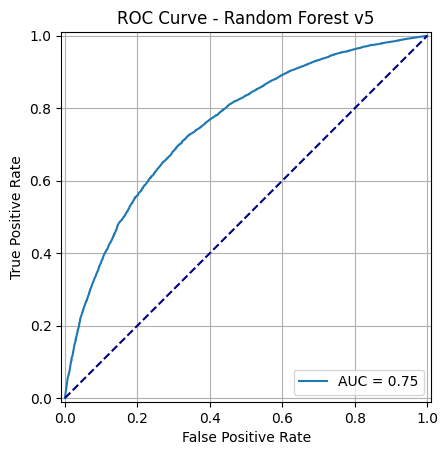

AUC Score: 0.755


In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities on the test set using model_v5
# Convert X_test_top5 back to a DataFrame if it's not already
if not isinstance(X_test_top5, pd.DataFrame):
    # Note: This conversion assumes X_test_top5 was created directly from a NumPy array
    # If X_test_top5 was already a DataFrame subsetted from X_test_scaled (which was a DataFrame),
    # this conversion might not be necessary, but it's added for robustness.
    # A more robust approach would be to ensure X_test_top5 is always a DataFrame
    # after subsetting X_test_scaled (which is now converted to a DataFrame).
    # Let's assume for now that the preceding cell that creates X_test_top5 will be fixed
    # to produce a DataFrame. If not, we might need a more complex fix here.
    # For now, we'll proceed assuming X_test_top5 is a DataFrame or will be made a DataFrame.
    pass # Assuming X_test_top5 is already a DataFrame or will be in future execution


y_prob = model_v5.predict_proba(X_test_top5)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot()
plt.title('ROC Curve - Random Forest v5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.grid()
plt.show()

# Print AUC score
print(f"AUC Score: {auc_score:.3f}")

## Hyperparameter Tuning

### Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Smaller and more efficient search space
param_dist = {
    'n_estimators': [200, 300, 400, 500],          # Number of trees
    'max_depth': [8, 12, 16, None],                # Limit depth or grow fully
    'min_samples_split': [2, 5, 10, 20],           # Min samples to split
    'min_samples_leaf': [1, 2, 5, 10],             # Min samples per leaf
    'max_features': ['sqrt', 'log2'],              # Standard RF options
    'class_weight': ['balanced', 'balanced_subsample']  # Handle imbalance
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # Sample 20 random combinations
    cv=3,                      # 3-fold cross-validation
    scoring='f1',              # Optimize for F1 score
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_top3, y_train)

print("Best Parameters:", random_search.best_params_)
#print classification report
y_pred = random_search.predict(X_test_top3)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Best F1 Score (CV):", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16, 'class_weight': 'balanced'}
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67     11767
           1       0.73      0.72      0.73     14028

    accuracy                           0.70     25795
   macro avg       0.70      0.70      0.70     25795
weighted avg       0.70      0.70      0.70     25795

Best F1 Score (CV): 0.7175124418709959


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Ensure X_train_top3 is a DataFrame with the correct columns
if not isinstance(X_train_top3, pd.DataFrame):
    # This conversion assumes X_train_top3 was created from a NumPy array.
    # A more robust approach would be to ensure X_train_top3 is always a DataFrame
    # after subsetting X_train_scaled (which is now converted to a DataFrame).
    # For now, we'll proceed assuming X_train_top3 is a DataFrame or will be made a DataFrame.
    pass # Assuming X_train_top3 is already a DataFrame or will be in future execution


# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    random_search,
    X_train_top3,  # Use the training data used for hyperparameter tuning
    y_train,
    cv=3,  # Use the same cross-validation strategy as GridSearchCV
    scoring='f1', # Use the same scoring metric as GridSearchCV
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Use 10 different sizes of the training set
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve (Random Forest - Tuned)")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
plt.legend(loc="best")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


###Feature Importance

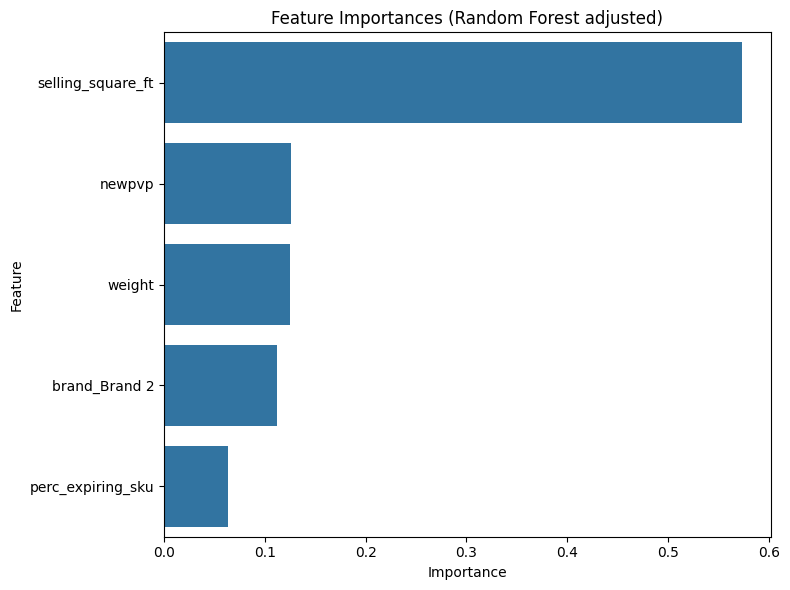

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get importances and corresponding feature names
importances = best_rf.feature_importances_
# Use the columns from the DataFrame used for training the model (X_train_top4)
features = X_train_top3.columns

# 2. Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances (Random Forest adjusted)')
plt.tight_layout()
plt.show()

### Confusion matrix dataset

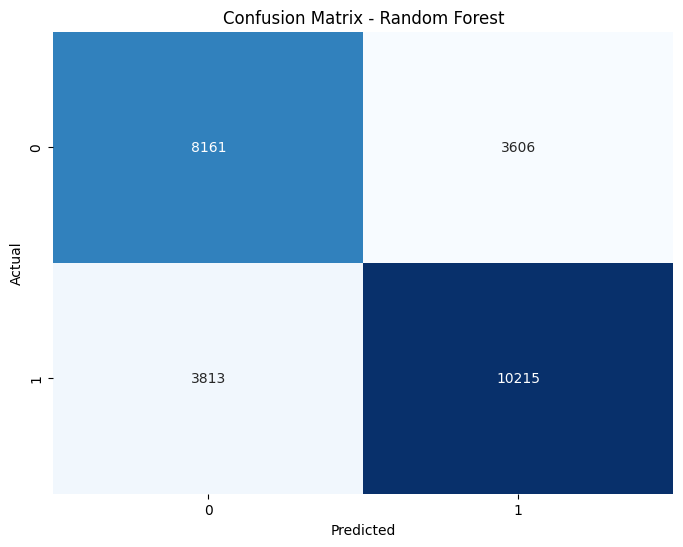

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_rf.predict(X_test_top3)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Confusion matrix Brand 2

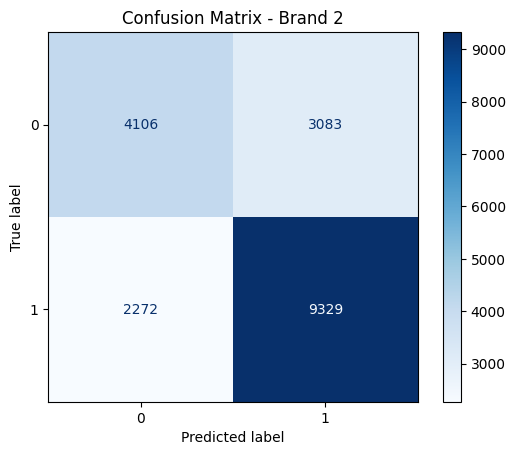

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Recreate brand_test using the index of y_test from the original dataframe
brand_test = df.loc[y_test.index, 'brand']

# 1. Filter test set for Brand 2
mask_brand2 = brand_test == 'Brand 2'
y_test_brand2 = y_test[mask_brand2]
y_pred_brand2 = y_pred[mask_brand2]

# 2. Compute confusion matrix
cm = confusion_matrix(y_test_brand2, y_pred_brand2)

# 3. Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Brand 2')
plt.show()

### Accuracy by brand

In [ ]:
#Accuracy by brand of best_rf
for brand in brand_test.unique():
    mask = brand_test == brand
    brand_acc = accuracy_score(y_test[mask], y_pred[mask])
    print(f"Accuracy for brand '{brand}': {brand_acc:.3f}")

Accuracy for brand 'Brand 5': 0.675
Accuracy for brand 'Brand 2': 0.715
Accuracy for brand 'Brand 7': 0.716
Accuracy for brand 'Brand 15': 0.694
Accuracy for brand 'Brand 3': 0.648
Accuracy for brand 'Brand 25': 0.738
Accuracy for brand 'Brand 28': 0.694
Accuracy for brand 'Brand 13': 0.767
Accuracy for brand 'Brand 8': 0.733
Accuracy for brand 'Brand 26': 0.736
Accuracy for brand 'Brand 9': 0.698
Accuracy for brand 'Brand 33': 0.768
Accuracy for brand 'Brand 6': 0.735
Accuracy for brand 'Brand 18': 0.684
Accuracy for brand 'Brand 4': 0.654
Accuracy for brand 'Brand 29': 0.697
Accuracy for brand 'Brand 10': 0.800
Accuracy for brand 'Brand 17': 0.827
Accuracy for brand 'Brand 21': 0.958
Accuracy for brand 'Brand 12': 0.889
Accuracy for brand 'Brand 16': 0.667
Accuracy for brand 'Brand 40': 0.417
Accuracy for brand 'Brand 23': 1.000
Accuracy for brand 'Brand 20': 0.333
